










# Sabores de Cacao

El chocolate es uno de los dulces más populares del mundo. Cada año, los residentes de Estados Unidos consumen colectivamente más de 2.800 millones de libras. Sin embargo, no todas las barras de chocolate son iguales. Este conjunto de datos contiene valoraciones de expertos sobre más de 1.700 barras de chocolate, junto con información sobre su origen regional, el porcentaje de cacao, la variedad de grano de chocolate utilizado y el lugar de cultivo de los granos.

In [1]:
#importar el archivo csv. 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/sabores_del_cacao.csv')

In [2]:
#lo primero es hacer un breve analisis general segun los tipos de datos y cantidad de datos que tenemos disponibles
df.head(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [3]:
df.shape

(1795, 9)

In [20]:
df['REF'].describe()#ver las dimensiones de nuestro DataFrame

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: REF, dtype: float64

asi de primeras vemos una variedad de tipos de variables, tenemos tanto cualitativas, cauntitativas discretas y continuas por lo cual la intencion principal es como se relacionan las variables mas importantes entre si, esto lo hacemos con graficas de dispercion, de barras y heatmap.

quizas la variable que mas llama la atencion es el rating, ya que es nuestra forma de valorar el sabor de este, asi que analizaremos la relacion de los datos con esta misma. lo primero sera el porcentaje de cacao, ya que esta es uno de los datos que nos llama la atencion desde el enunciado inicial "no todas las barras de chocolate son iguales.", veamos como se relaciona este enunciado con el porcentaje de cacao.

In [4]:
#lo primero que hacemos es quitar ese '%' ya que python no lo lee como numero sino como letras.
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('%','').astype('float')

In [5]:
#ahora que lo quitamos usamos el metodo '.corr()' para ver la correlacion entre 'porcentaje de cacao' y 'Rating'

pcacao_Rating= pd.concat([df['Cocoa\nPercent'],df['Rating']], axis=1)
#el metodo concat lo usamos para unir las 2 variables en un dataframe, y el axis=1 para ordenarlas a lo largo de el eje vertical

pcacao_Rating

,Cocoa\nPercent,Rating
0,63.0,3.75
1,70.0,2.75
2,70.0,3.00
3,70.0,3.50
4,70.0,3.50
...,...,...
1790,70.0,3.75
1791,65.0,3.00
1792,65.0,3.50
1793,62.0,3.25


In [6]:
#para empezar a graficas importamos las librerias.
import scipy as sp#libreria para analisis numericos
import matplotlib.pyplot as plt#libreria para generar graficas
import seaborn as sns#es como plt pero las graficas son mas bonitas:)
from scipy.stats import norm
from scipy import stats
import warnings
import numpy as np#libreria para operaciones numericas
%matplotlib inline

<AxesSubplot:>

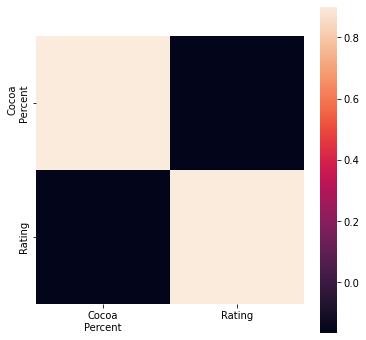

In [7]:
corrp = pcacao_Rating.corr()#correlacionar variables numericas
f, ax = plt.subplots(figsize=(6,6))#dimensiones de la grafica
sns.heatmap(corrp, vmax=.9, square =True)#grafica de calor para ver la correlacion de datos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, '42.0'),
  Text(1, 0, '46.0'),
  Text(2, 0, '50.0'),
  Text(3, 0, '53.0'),
  Text(4, 0, '55.0'),
  Text(5, 0, '56.0'),
  Text(6, 0, '57.0'),
  Text(7, 0, '58.0'),
  Text(8, 0, '60.0'),
  Text(9, 0, '60.5'),
  Text(10, 0, '61.0'),
  Text(11, 0, '62.0'),
  Text(12, 0, '63.0'),
  Text(13, 0, '64.0'),
  Text(14, 0, '65.0'),
  Text(15, 0, '66.0'),
  Text(16, 0, '67.0'),
  Text(17, 0, '68.0'),
  Text(18, 0, '69.0'),
  Text(19, 0, '70.0'),
  Text(20, 0, '71.0'),
  Text(21, 0, '72.0'),
  Text(22, 0, '72.5'),
  Text(23, 0, '73.0'),
  Text(24, 0, '73.5'),
  Text(25, 0, '74.0'),
  Text(26, 0, '75.0'),
  Text(27, 0, '76.0'),
  Text(28, 0, '77.0'),
  Text(29, 0, '78.0'),
  Text(30, 0, '79.0'),
  Text(31, 0, '80.0'),
  Text(32, 0, '81.0'),
  Text(33, 0, '82.0'),
  Text(34, 0, '83.0'),

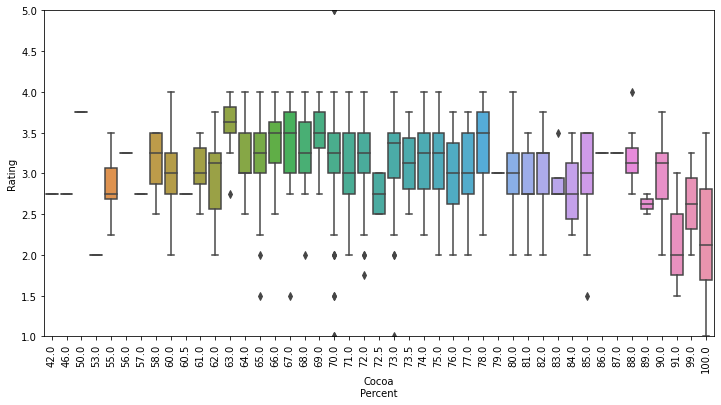

In [8]:
#aqui vemos que el % de caceo no influye directamente en el Rating, y esto queda mas claro aun si lo graficamos

f,ax = plt.subplots(figsize=(12,6))#dimension de la grafica
fig = sns.boxplot(x='Cocoa\nPercent', y='Rating', data=pcacao_Rating)#utilizo seaborn para hacer una grafica de cajas y bigotes
fig.axis(ymin=1.0,ymax=5.0)
plt.xticks(rotation=90)#uso plt para rotar los elementos de el eje x para que no se amontonen y se puedan leer sin problema

# Clonclusion de 'Cocoa\nPercent'/Rating

Como vemos en el heatmap y la boxplot no hay una relacion directa entre el porcentaje de cacao y el Rating, esto se ve mas claro en la boxplot, aqui se ve que a lo largo de la grafica esta apenas varia.

# Company\nLocation	/ Rating

ahora veremos en que pais se producen mas chocolate y la relacion que tiene la localizacion de estas compañias con el Rating para ver en que paises las compañias producen Mejor chocolate (segun la variable Rating)

In [9]:
companyL = df['Company\nLocation'].value_counts()#hacer un conteo de los varoles en Company/location
companyL = pd.DataFrame(companyL)#crear un DataFrame con la informacion de el Value_counts()
companyL.reset_index(inplace=True)#resetar el indice y que el DF quede ordenado
companyL.columns=('Company Location','Frecuency')#nombrar las columnas
top5company = companyL.head(5)#mostrar primeros 5 datos
top5company

,Company Location,Frecuency
0,U.S.A.,764
1,France,156
2,Canada,125
3,U.K.,96
4,Italy,63


<AxesSubplot:xlabel='Company Location', ylabel='Frecuency'>

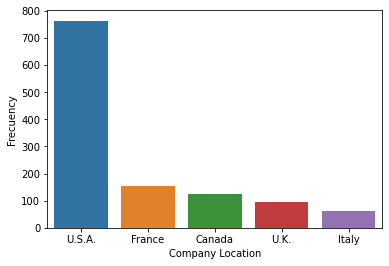

In [10]:
sns.barplot(x='Company Location', y='Frecuency', data = top5company)

aqui vemos que la mayor produccion por ubicacion de las compañias esta en U.S.A con mucha diferencia... pero y si quisieramos saber donde estan las compañias que hacen los mejores chocolates?

In [11]:
#miraremos la relacion entre Compnay location y Rating para ver en que pais estan las mejores compañias a nivel de calidad segun la variable Rating
CL_R= df.groupby('Company\nLocation').aggregate({'Rating':'mean'})#agrupamos los datos de Company/location con el promedio de Rating
CL_R = CL_R.sort_values('Rating', ascending=False).head(20)#sort values=ascending es para colocarlos acendendentes y usamos el False para colocarlos descendentes
CL_R = CL_R.reset_index()#con esto reseteamos el indice
CL_R.head(5)

,Company\nLocation,Rating
0,Chile,3.750000
1,Amsterdam,3.500000
2,Netherlands,3.500000
3,Philippines,3.500000
4,Iceland,3.416667


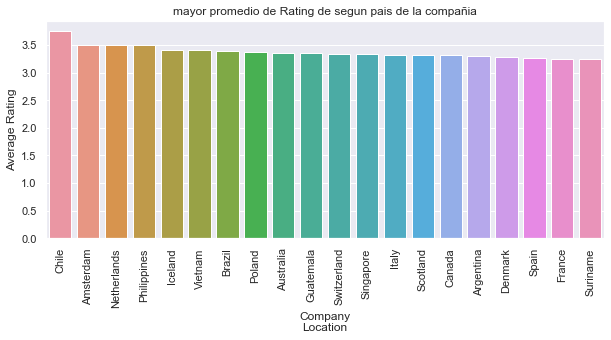

In [12]:
#ahora grafiquemos usando seaborn para que analizar mejor esta relacion de variables
sns.set()
plt.figure(figsize=(10,4))#dimensiones de la grafica
sns.barplot(x='Company\nLocation', y='Rating', data=CL_R)#usamos seaborn para hacer graficos de barra
fig.axis(ymin=1.0,ymax=5.0)#limites minimo y maximos de rating en el eje y
plt.xlabel("Company\nLocation")#cambiar titulo de x
plt.ylabel("Average Rating")#cambiar titulo de y
plt.title("mayor promedio de Rating de segun pais de la compañia")#cambiar titulo de la grafica
plt.xticks(rotation=90)#rotar 90° para visualizar los elementos de el eje x sin que se amontonen
plt.show()#mostrar la grafica



# Conclusion de Company/Location y Rating

en estas graficas podemos concluir que U.S.A es uno de los mayores productores de chocolate en cantidad... no esta ni en el Top 20 de Calidad, como la ley de la vidad Cantidad ≠ Calidad.

tenemos tambien el otro lado de la moneda, chile y paises bajos no estan entre los paises mas productores pero el Rating tiene el promedio mas alto priorizando la calidad por encima de la cantidad.

# Broad Bean Origin/Rating

ahora haremos algo muy parecido al de la ubicacion de la compañia pero esta vez lo haremos con La región geográfica de origen del grano y ver como se relaciona con el Rating 

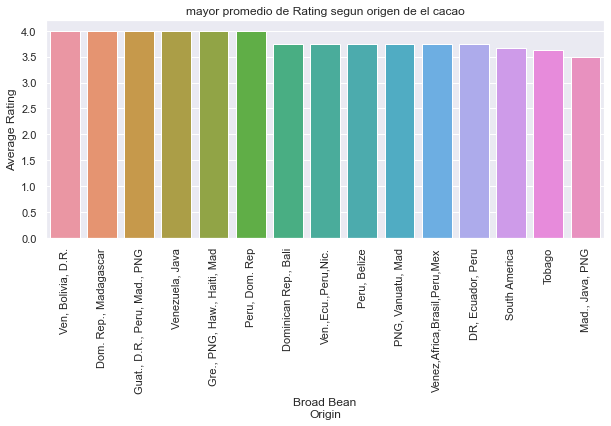

In [17]:
BeanO_R = df.groupby('Broad Bean\nOrigin').aggregate({'Rating':'mean'})#aqui agrupamos las variables de 'Broad bean origin' con el promedio de 'Rating'
BeanO_R = BeanO_R.sort_values('Rating', ascending=False).head(15)#usamos metodo sort_values y ascending para ordenar de menor a mayor y False para imvertirlo a descendiente
BeanO_R = BeanO_R.reset_index()#resetear el indice
sns.set()
plt.figure(figsize=(10,4))#dimensiones de la Grafica
sns.barplot(x='Broad Bean\nOrigin', y='Rating', data=BeanO_R)#usamos seaborn para graficar con diagrama de barras con la data de BeamO_R
plt.xlabel("Broad Bean\nOrigin")#cambiar titulo de x
plt.ylabel("Average Rating")#cambiar titulo de Y
plt.title("mayor promedio de Rating segun origen de el cacao")#cambiar el titulo de el Diagrama 
plt.xticks(rotation=90)#Rotar a 90° elementos de x para que no se amontonen
plt.show()#mostrar la Grafica

# Conclusion de Broad Bean Origin/Rating.

aqui podemos ver que no hay un lugar de Origen dominante, de hecho tenemos muchisimos. por lo cual podriamos considerar que no es una variable de el todo confiable para hacer una conclusion definitiva por lo inconclusa que es 

# Specific Bean Origin\nor Bar Name y Rating

ahora analizaremos el origen especifico de el chocolate, sea Region Geografica o nombre de el Bar y ver cuales tienen mejor calidad segun la variable Rating

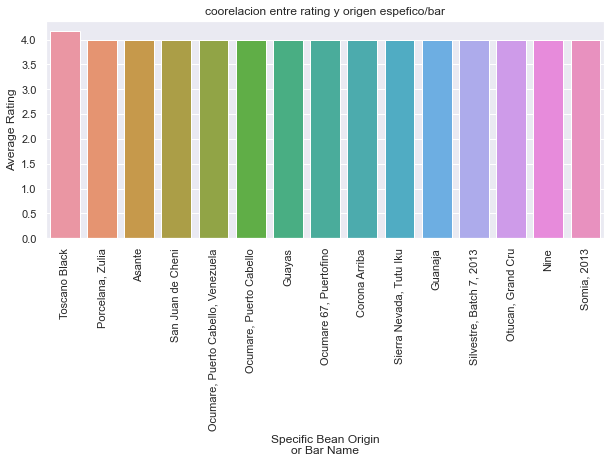

In [18]:
RegionObar_R = df.groupby('Specific Bean Origin\nor Bar Name').aggregate({'Rating':'mean'})
RegionObar_R = RegionObar_R.sort_values('Rating', ascending=False).head(15)
RegionObar_R = RegionObar_R.reset_index()
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='Specific Bean Origin\nor Bar Name', y='Rating', data=RegionObar_R)
plt.xlabel("Specific Bean Origin\nor Bar Name")
plt.ylabel("Average Rating")
plt.title("coorelacion entre rating y origen espefico/bar")
plt.xticks(rotation=90)
plt.show()


# Conclusion de 'Specific Bean Origin\nor Bar Name y Rating'

aqui vemos un claro dominante con un espectacular 4.5, este es el Bar toscano Black. seguido de este tenemos 2 regiones Geograficas que son Porcelana y Zulia con promedio llamativo de 4.0

# COMENTARIOS


-como primer analisis concluimos que el porcentaje cacao no estaba directamente relacionado con el Rating de los chocolates, esto por la poca dispersion de los Datos.

-Calidad vs Cantidad, el siguiente analisis nos pone en una situacion muy interesante, paises como estados unidos que tienen una produccion de chocolates en masa pero que su calidad no esta entre las  mejores, y paises como chile que no son de los mas productores y tienen una calidad bastante buena.

-posteriormente tenemos una cantidad de relaciones bastante interesante sobre los origenes de las barras donde a nvel de paises tenemos muchos paises con un promedio de rating bastante alto como Venezuela, Republica dominicana o Madagascar...Etc por otro lado tenemos en los origenes mucho mas especificos con un rendimiento espectacular de 4.5 como Toscano Black o regiones geograficas como Zulia con un destacado 4.0